# Playground for Linear Regression using Normal Equation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
X_train = np.random.random(size=(500, 1)) + 5
X_test = np.random.random(size=(500, 1)) + 5
bias = np.random.normal(0, 0.21, size=(500, 1))
y_train = 2 * X_train + 5 + bias
y_test = 2 * X_test + 5 + bias

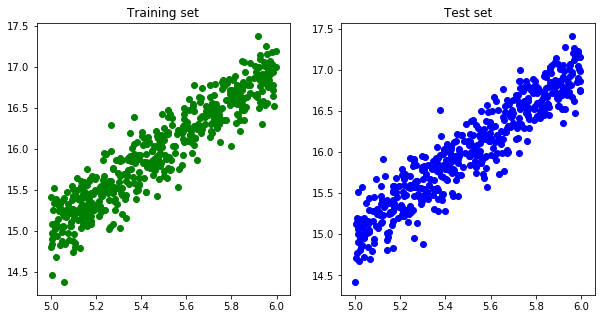

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X_train, y_train, c='g')
axes[0].set_title("Training set")
axes[1].scatter(X_test, y_test, c='b')
axes[1].set_title("Test set");

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

## Full Batch Linear Regression using Normal Equation

In [0]:
from scipy.linalg import inv
import numpy as np

class FullBatchLinearRegression():
	
    """
    Imitation of LinearRegression estimator from sklearn.
    It doesn't take any parameters or hyperparameters. 
    This estimator will use full-batch, which means that it uses
    all the data points and makes it slow to process a lot of data 
    points.


    Parameters: 
    ----------
    |------|


    Attributes:
    ----------

    coef_ : array, shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
        Weights assigned to the features.

    intercept_ : array, shape (1,) if n_classes == 2 else (n_classes,)
        Constants in decision function.


    Methods:
    -------

    train : parameters -> (X, y)
        X : array-like
            feature matrix to train the model
        y : array-like
            target vector to train the model

    predict : parameters -> X
        X : array-like
            feature matrix to make prediction

    score : parameters -> (X, y)
        X : array-like
            feature matrix
        y : array-like 
            target vector

    """


    def __init__(self):
        pass

    def train(self, X, y):	
        X = np.c_[np.ones(X.shape[0]), X]
        weights = inv(X.T.dot(X)).dot(X.T).dot(y)
        self.weights_ = weights[1:].ravel()
        self.bias_ = weights[0]
        return self

    def predict(self, X):
        return X.dot(self.weights_.reshape(-1, 1)) + self.bias_

    def score(self, X, y):
        predictions = self.predict(X)
        labels = y
        if len(predictions) == len(labels):
            ybar = np.mean(labels)
            sres = np.sum(np.power(labels - predictions, 2))
            stot = np.sum(np.power(labels - ybar, 2))
            return 1 - (sres / stot)
        else:
            raise ValueError("The length of predictions and labels are not the same")


In [0]:
full_batch_regressor = FullBatchLinearRegression().train(X_train, y_train)
print("Regressor weights: ", full_batch_regressor.weights_)
print("Regressor bias: ", full_batch_regressor.bias_)

Regressor weights:  [1.95384289]
Regressor bias:  [5.25964782]


In [0]:
print("Sklearn LinearRegression R-Squared Score: ", lin_reg.score(X_test, y_test))
print("My FullBatchLinearRegression R-Squared Soore: ", full_batch_regressor.score(X_test, y_test))

Sklearn LinearRegression R-Squared Score:  0.876938802067995
My FullBatchLinearRegression R-Squared Soore:  0.8769388020680046


## Mini Batch Linear Regression Using Normal Equation  

In [0]:
class MiniBatchLinearRegression(FullBatchLinearRegression):

    """
    Imitation of LinearRegression estimator from sklearn.
    It doesn't take any parameters or hyperparameters. 
    This estimator will use full-batch, which means that it uses
    all the data points and makes it slow to process a lot of data 
    points.


    Parameters: 
    ----------
    |------|


    Attributes:
    ----------

    coef_ : array, shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
        Weights assigned to the features.

    intercept_ : array, shape (1,) if n_classes == 2 else (n_classes,)
        Constants in decision function.


    Methods:
    -------

    train : parameters -> (X, y)
        X : array-like
            feature matrix to train the model
        y : array-like
            target vector to train the model

    predict : parameters -> X
        X : array-like
            feature matrix to make prediction

    score : parameters -> (X, y)
        X : array-like
            feature matrix
        y : array-like 
            target vector

    """

    def __init__(self, num_batch, shuffle=True, random_state=42, how='mean'):
        self.num_batch = num_batch
        self.shuffle = shuffle
        self.random_state = random_state
        self.how = how

    def train(self, X, y):
        # setting random seed
        np.random.seed(self.random_state)
        # creating index batch
        if self.shuffle:
            index_batch = np.array_split(np.random.permutation(X.shape[0]), self.num_batch)
        else:
            index_batch = np.array_split(np.arange(X.shape[0]), self.num_batch)
        # instantiate weights matrix and bias vector, containing weights and bias \
        # from all batches
        weights_mat = np.zeros(shape=X.shape[1])
        bias_vec = [0]
        # start to train
        for index in index_batch:
            batch_X = X[index]
            batch_y = y[index]
            batch_X = np.c_[np.ones(batch_X.shape[0]), batch_X]
            weights_term = inv(batch_X.T.dot(batch_X)).dot(batch_X.T).dot(batch_y)
            weights = weights_term[1:].ravel()
            bias = weights_term[0]
            weights_mat = np.vstack([weights_mat, weights])
            bias_vec = np.append(bias_vec, bias)
        weights_mat = weights_mat[1:]
        bias_vec = bias_vec[1:]
        # how to aggregate the weights matrix and bias vector
        if self.how == 'mean':
            # assign it as instance variable
            self.weights_ = np.median(weights_mat, axis=0)
            self.bias_ = np.median(bias_vec)
        elif self.how == 'median':
            self.weights_ = np.mean(weights_mat, axis=0)
            self.bias_ = np.mean(bias_vec)

        return self

In [0]:
mini_batch_vers1_regressor = MiniBatchLinearRegression(25, how='mean').train(X_train, y_train)

In [0]:
print(mini_batch_vers1_regressor.weights_)
print(mini_batch_vers1_regressor.bias_)

[1.96793502]
5.175430537704308


In [0]:
print("Sklearn LinearRegression R-Squared Score: ", lin_reg.score(X_test, y_test))
print("My FullBatchLinearRegression R-Squared Soore: ", full_batch_regressor.score(X_test, y_test))

0.876938802067995
0.8771329523865463


## Stochastic Linear Regression


In [0]:
class StochasticLinearRegression(FullBatchLinearRegression):

    def __init__(self, size='same', )